# **AN√ÅLISIS DE FACTORES QUE INFLUYEN EN LA CAPACIDAD COGNITIVA**

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gesti√≥n de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_analisis= pd.read_csv("df_test.csv")
df_analisis.sample(4)

user_id  age  gender  sleep_duration  stress_level       diet_type  \
25757    25758   28  Female             9.6             3      Vegetarian   
73473    73474   41    Male             9.9             8  Non-Vegetarian   
11713    11714   26  Female             7.3             8  Non-Vegetarian   
43476    43477   26    Male             7.3            10  Non-Vegetarian   

       daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
25757                9.3                Low              478         216.97   
73473                1.0             Medium              409         233.22   
11713                7.9               High              448         332.09   
43476                3.4                Low              398         282.00   

       memory_test_score  cognitive_score  ai_predicted_score  
25757                 75            86.03               89.53  
73473                 61            90.75               89.69  
11713                 75            69.94               67.46  
43476                 55            57.04               56.03

In [6]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             80000 non-null  int64  
 1   age                 80000 non-null  int64  
 2   gender              80000 non-null  object 
 3   sleep_duration      80000 non-null  float64
 4   stress_level        80000 non-null  int64  
 5   diet_type           80000 non-null  object 
 6   daily_screen_time   80000 non-null  float64
 7   exercise_frequency  80000 non-null  object 
 8   caffeine_intake     80000 non-null  int64  
 9   reaction_time       80000 non-null  float64
 10  memory_test_score   80000 non-null  int64  
 11  cognitive_score     80000 non-null  float64
 12  ai_predicted_score  80000 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.9+ MB


In [7]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [8]:
def obtener_conteo_valores_unicos(df_analisis):
    conteo_unicos = {}
    for columna in df_analisis.columns:
        conteo_unicos[columna] = df_analisis[columna].value_counts()
    return conteo_unicos

diccionario_conteo = obtener_conteo_valores_unicos(df_analisis)

print("\nConteo de valores √∫nicos por columna:")
for columna, conteo in diccionario_conteo.items():
    print(f"\n'{columna}':\n{conteo}")


Conteo de valores √∫nicos por columna:

'user_id':
user_id
1        1
53331    1
53338    1
53337    1
53336    1
        ..
26667    1
26666    1
26665    1
26664    1
80000    1
Name: count, Length: 80000, dtype: int64

'age':
age
40    1979
50    1972
32    1963
29    1961
49    1959
44    1956
37    1955
43    1944
18    1941
33    1938
28    1928
19    1925
54    1924
58    1921
34    1921
55    1920
47    1920
48    1918
35    1915
56    1915
27    1914
22    1909
39    1909
51    1902
25    1901
30    1893
46    1888
53    1887
57    1887
31    1878
38    1877
24    1875
42    1872
59    1868
41    1859
21    1858
36    1853
20    1848
52    1848
26    1847
23    1829
45    1823
Name: count, dtype: int64

'gender':
gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64

'sleep_duration':
sleep_duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: cou

Pasos para el An√°lisis:

- Visualizaciones: 
    La clave ahora es crear visualizaciones para entender mejor las distribuciones de cada variable y las relaciones entre ellas. 

    Algunas visualizaciones √∫tiles podr√≠an ser:

    **Histogramas y gr√°ficos de densidad**: Para variables num√©ricas (*age, sleep_duration, stress_level, daily_screen_time, caffeine_intake, reaction_time, memory_test_score, cognitive_score, ai_predicted_score*) para ver sus distribuciones.

    **Gr√°ficos de barras**: Para variables categ√≥ricas (g*ender, diet_type, exercise_frequency*) para ver las proporciones de cada categor√≠a.

    **Boxplots**: Para comparar la distribuci√≥n de una variable num√©rica entre diferentes categor√≠as de una variable categ√≥rica (*ej., sleep_duration por gender*).

    **Scatter plots**: Para visualizar la relaci√≥n entre dos variables num√©ricas (*ej., sleep_duration vs. cognitive_score*).

    **Heatmap de correlaci√≥n**: Para ver las correlaciones entre todas las variables num√©ricas.

    **Estad√≠sticas Descriptivas**: Calcular medidas como la media, mediana, desviaci√≥n est√°ndar, cuartiles para las variables num√©ricas para cuantificar sus caracter√≠sticas centrales y dispersi√≥n. *(.describe())*

    **An√°lisis Bivariado y Multivariado**: Investigar las relaciones entre pares y grupos de variables. 
    Por ejemplo, *¬øc√≥mo se relaciona la edad con la duraci√≥n del sue√±o y el rendimiento de la memoria?* 
    *¬øHay diferencias en el rendimiento cognitivo entre diferentes tipos de dieta y niveles de ejercicio?*

In [9]:
''' Identificador de usuario ("user_id") , 
Edad ("age"), 
G√©nero ("gender), 
Duraci√≥n del sue√±o ("sleep_duration"), 
Nivel de estr√©s("stress_level"), 
Tipo de dieta ("diet_type"), 
Tiempo diario de pantalla ("daily_screen_time"), 
Frecuencia de ejercicio ("exercise_frequency"), 
Consumo de cafe√≠na ("caffeine_intake"), 
Tiempo de reacci√≥n ("reaction_time"), 
Puntuaci√≥n de la prueba de memoria ("memory_test_score"), 
Puntuaci√≥n cognitiva ("cognitive_score"), 
Puntuaci√≥n predicha por IA ("ai_predicted_score")'''

' Identificador de usuario ("user_id") , \nEdad ("age"), \nG√©nero ("gender), \nDuraci√≥n del sue√±o ("sleep_duration"), \nNivel de estr√©s("stress_level"), \nTipo de dieta ("diet_type"), \nTiempo diario de pantalla ("daily_screen_time"), \nFrecuencia de ejercicio ("exercise_frequency"), \nConsumo de cafe√≠na ("caffeine_intake"), \nTiempo de reacci√≥n ("reaction_time"), \nPuntuaci√≥n de la prueba de memoria ("memory_test_score"), \nPuntuaci√≥n cognitiva ("cognitive_score"), \nPuntuaci√≥n predicha por IA ("ai_predicted_score")'

Las preguntas que vamos a responder en funci√≥n de que las estad√≠sticas nos den resultados a destacar son:
1. ¬øCu√°l es la relaci√≥n de edad y duraci√≥n del sue√±o?
2. Ver correlaciones num√©ricas en Heatmap
3. ¬øRelaci√≥n puntuaci√≥n pruebas y nivel de ingesta de cafe√≠na?
4. ¬øRelaci√≥n dieta con puntuaciones?
5. ¬øRelaci√≥n ingesta de cafe√≠na con horas de sue√±o?
6. ...

**Es importante clasificar las puntuaciones de los tests para una mejor interpretaci√≥n de los resultados**

In [10]:
df_analisis["age"].unique()

array([57, 39, 26, 32, 50, 36, 48, 35, 29, 54, 18, 51, 24, 19, 21, 37, 20,
       33, 23, 22, 46, 44, 58, 43, 45, 49, 42, 47, 38, 27, 41, 31, 56, 30,
       55, 53, 34, 25, 59, 52, 28, 40], dtype=int64)

In [11]:
df_analisis.head()

user_id  age  gender  sleep_duration  stress_level       diet_type  \
0        1   57  Female             6.5             3  Non-Vegetarian   
1        2   39  Female             7.6             9  Non-Vegetarian   
2        3   26    Male             8.2             6      Vegetarian   
3        4   32    Male             7.8             9      Vegetarian   
4        5   50    Male             9.7             2  Non-Vegetarian   

   daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   memory_test_score  cognitive_score  ai_predicted_score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

## Lineplot relacionando la edad y las horas de sue√±o promedio por persona al d√≠a

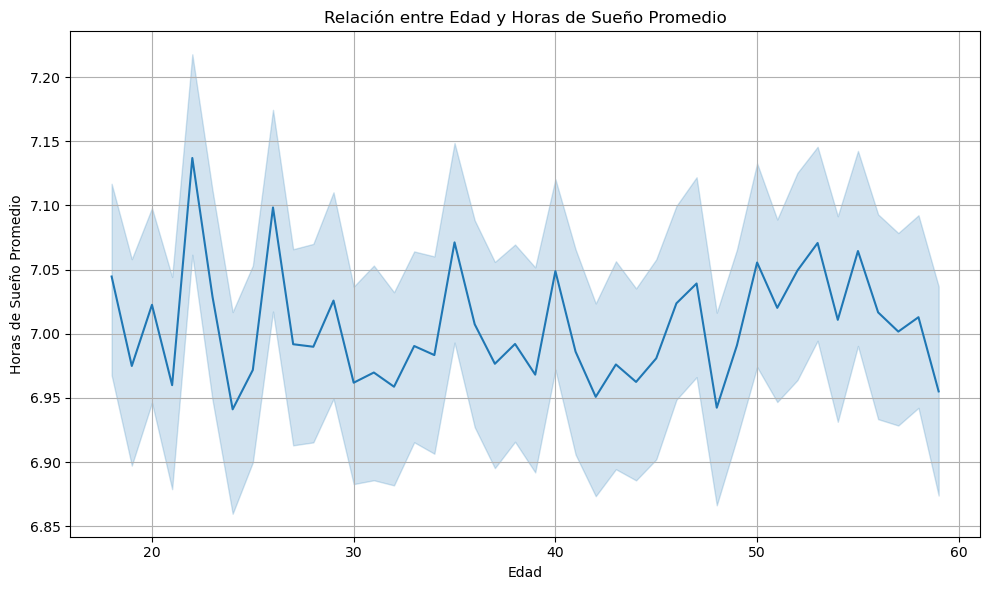

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='sleep_duration', data=df_analisis)
plt.title('Relaci√≥n entre Edad y Horas de Sue√±o Promedio')
plt.xlabel('Edad')
plt.ylabel('Horas de Sue√±o Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
lista = df_analisis.columns, 

*age*

> ¬øC√≥mo se distribuyen las edades de los individuos en el conjunto de datos?
 
> ¬øHay alg√∫n grupo de edad predominante?

Histograma de la variable "age": Esta gr√°fica mostrar√≠a la distribuci√≥n de las edades de los individuos en el DataFrame, lo que nos permitir√≠a obtener informaci√≥n sobre la dispersi√≥n y la forma de la distribuci√≥n.

<Axes: xlabel='age', ylabel='Count'>

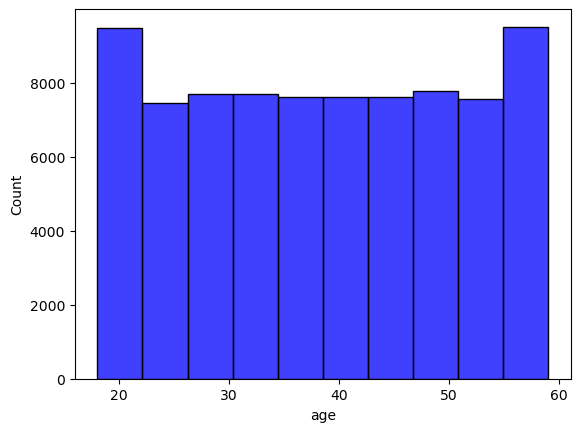

In [14]:
sns.histplot(df_analisis, x="age", bins=10, kde=False, color="blue")

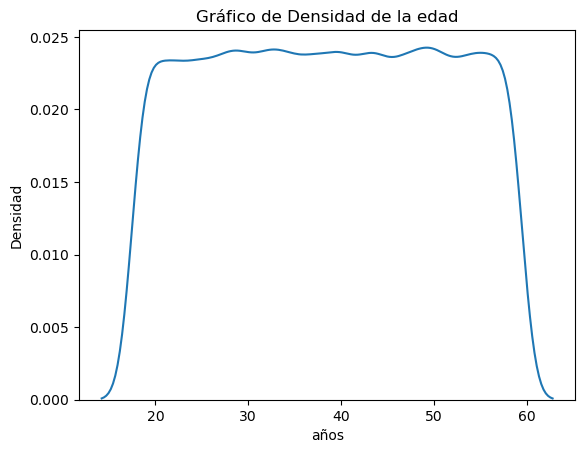

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo con seaborn
sns.kdeplot(df_analisis['age'])
plt.title('Gr√°fico de Densidad de la edad')
plt.xlabel('a√±os')
plt.ylabel('Densidad')
plt.show()

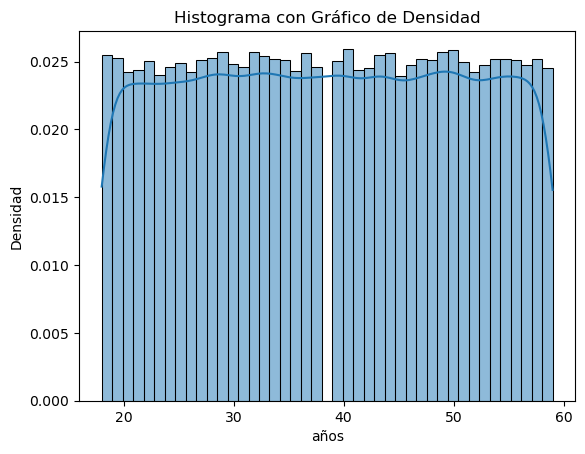

In [16]:
# Tambi√©n puedes superponerlo con un histograma
sns.histplot(df_analisis['age'], kde=True, stat="density")
plt.title('Histograma con Gr√°fico de Densidad')
plt.xlabel('a√±os')
plt.ylabel('Densidad')
plt.show()

## Dividir edad por rangos:
Vamos a dividir la variable 'age' en rangos que representen diferentes generaciones. Esta es una propuesta de rangos generacionales comunes:

- Generaci√≥n Z (Gen Z): 13 - 28 a√±os (aproximadamente nacidos entre 1997 y 2007)
- Millennials (Generaci√≥n Y): 29 - 44 a√±os (aproximadamente nacidos entre 1981 y 1996)
- Generaci√≥n X: 45 - 60 a√±os (aproximadamente nacidos entre 1965 y 1980)

In [17]:
def clasificar_generacion(edad):
    """Clasifica la edad en grupos generacionales."""
    if 13 <= edad <= 28:
        return 'Gen Z'
    elif 29 <= edad <= 44:
        return 'Millennials'
    elif 45 <= edad <= 60:
        return 'Generaci√≥n X'
    return None  # Para edades fuera de estos rangos (si las hubiera)
        

### A√±adimos la columna de niveles categ√≥ricos

In [18]:
df_analisis['generation'] = df_analisis['age'].apply(clasificar_generacion)

In [19]:
# ¬øCuantos usuarios hay en cada generaci√≥n?
df_analisis['generation'].value_counts()

generation
Millennials     30673
Generaci√≥n X    28552
Gen Z           20775
Name: count, dtype: int64

### Visualizaci√≥n por generaci√≥n

**Gr√°fico de quesitos**

Text(0, 0.5, 'Frecuencia')

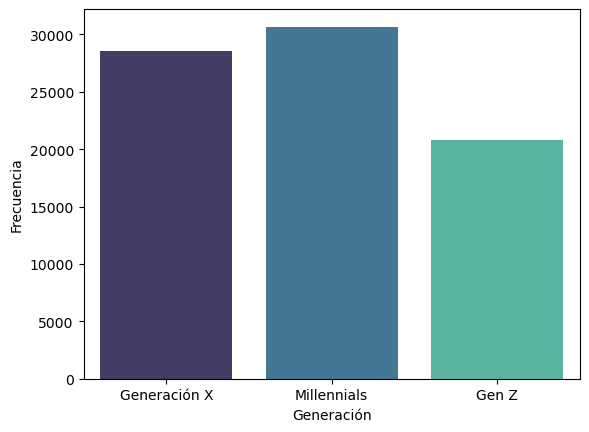

In [20]:
sns.countplot(x = "generation", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("Generaci√≥n")
plt.ylabel("Frecuencia")

### *Analizar c√≥mo las generaciones difieren en otras variables:*

**Agrupamos por 'generacion' y calculamos estad√≠sticas descriptivas (media, mediana, etc.) para otras columnas como 'sleep_duration', 'stress_level', 'memory_test_score', etc.*

In [21]:
print(df_analisis.groupby('generation')['sleep_duration'].mean())
print(df_analisis.groupby('generation')['memory_test_score'].mean())
print(df_analisis.groupby('generation')['stress_level'].mean())

generation
Gen Z           7.014522
Generaci√≥n X    7.015712
Millennials     6.989447
Name: sleep_duration, dtype: float64
generation
Gen Z           69.516390
Generaci√≥n X    69.451667
Millennials     69.529586
Name: memory_test_score, dtype: float64
generation
Gen Z           5.494248
Generaci√≥n X    5.501366
Millennials     5.486356
Name: stress_level, dtype: float64


*sleep_duration* *x* *generation*

## Lineplot para variables edad y horas de sue√±o

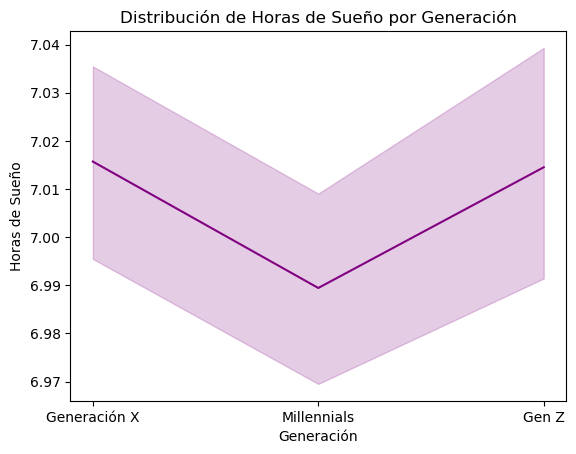

In [22]:
sns.lineplot(x='generation', y='sleep_duration', data=df_analisis, color = "purple")
plt.title('Distribuci√≥n de Horas de Sue√±o por Generaci√≥n')
plt.xlabel('Generaci√≥n')
plt.ylabel('Horas de Sue√±o')
plt.show()

## *Por generaci√≥n lo vemos m√°s claro*

*gender*

> ¬øQu√© ocurre con la variable 'Other'?

> ¬øInfluir√° el g√©nero en la capacidad cognitiva o el nivel de estr√©s?

## Gr√°fico de barras para ver relaci√≥n de g√©neros 

Text(0, 0.5, 'Frecuencia')

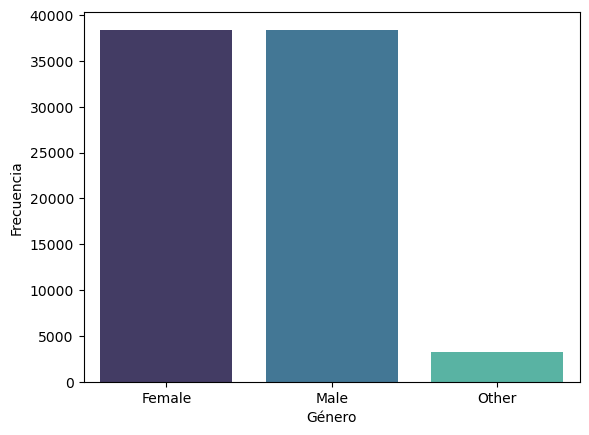

In [23]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("G√©nero")
plt.ylabel("Frecuencia")

*sleep_duration*

> ¬øCu√°l es la distribuci√≥n general de la duraci√≥n del sue√±o?

> ¬øHay valores at√≠picos (duraciones de sue√±o muy cortas o muy largas)?

## Gr√°fico de cajas o boxplot para ver valores at√≠picos

Text(0.5, 0, 'Horas de sue√±o')

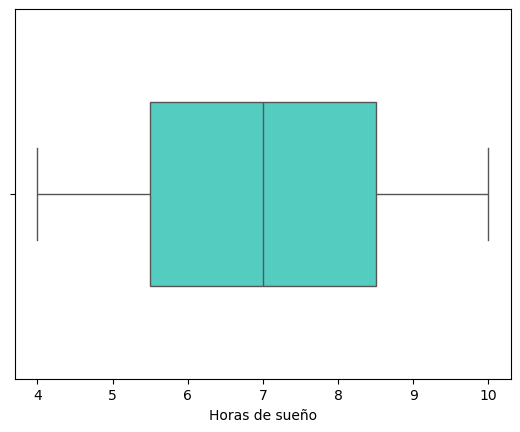

In [24]:
sns.boxplot(x = "sleep_duration", 
            data = df_analisis, 
            width = 0.5, 
            color = "turquoise")
plt.xlabel("Horas de sue√±o")

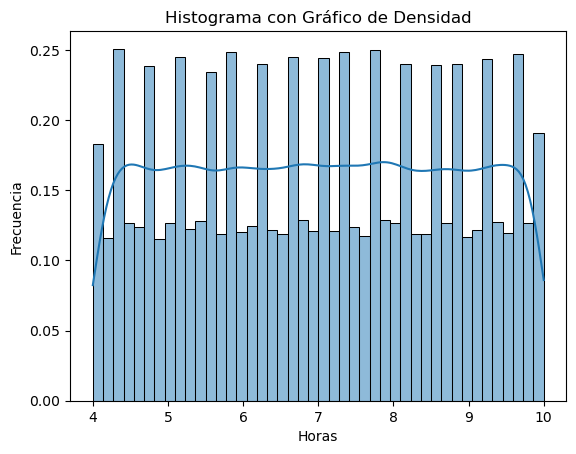

In [25]:
# Tambi√©n puedes superponerlo con un histograma
sns.histplot(df_analisis['sleep_duration'], kde=True, stat="density")
plt.title('Histograma con Gr√°fico de Densidad')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()

*diet_type*

## Gr√°fico de barras para ver relaci√≥n de dietas

Text(0, 0.5, 'Frecuencia')

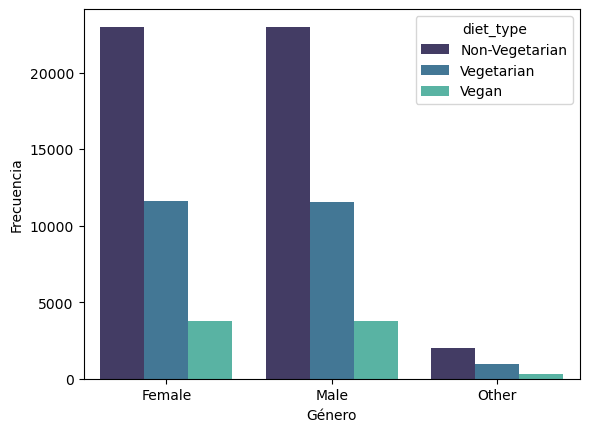

In [26]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b",
              hue = "diet_type")
plt.xlabel("G√©nero")
plt.ylabel("Frecuencia")

*stress_level*

## Dividir nivel de estr√©s por rangos:
Vamos a dividir la variable 'stress_level' en rangos que representen diferentes niveles para mejorar la visualizaci√≥n de los datos:
- Bajo: 1 - 3
- Medio: 4 - 7
- Alto: 8 - 10

In [27]:
def clasificar_stress(nivel):
    """Clasifica el nivel de estr√©s en categor√≠as."""
    if 1 <= nivel <= 3:
        return 'Low'
    elif 4 <= nivel <= 7:
        return 'Medium'
    elif 8 <= nivel <= 10:
        return 'High'
    return None  # Para valores fuera del rango esperado (si los hubiera)


### A√±adimos la columna de niveles categ√≥ricos en la variable de nivel de estr√©s

In [28]:
df_analisis['stress_category'] = df_analisis['stress_level'].apply(clasificar_stress)

In [29]:
df_analisis.sample()

user_id  age gender  sleep_duration  stress_level       diet_type  \
55150    55151   53   Male             5.8             7  Non-Vegetarian   

       daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
55150                4.6             Medium              190         324.32   

       memory_test_score  cognitive_score  ai_predicted_score    generation  \
55150                 72            73.85               74.69  Generaci√≥n X   

      stress_category  
55150          Medium

*caffeine_intake*

In [30]:
'''Seg√∫n indica la Administraci√≥n de Alimentos y Medicamentos (FDA) estadounidense 
y como cita el portal de divulgaci√≥n sobre salud Healthline, las dosis de hasta 400mg al d√≠a 
(entre dos y tres tazas de caf√©) son seguras para la mayor√≠a de las personas. '''

'Seg√∫n indica la Administraci√≥n de Alimentos y Medicamentos (FDA) estadounidense \ny como cita el portal de divulgaci√≥n sobre salud Healthline, las dosis de hasta 400mg al d√≠a \n(entre dos y tres tazas de caf√©) son seguras para la mayor√≠a de las personas. '

## Dividir los miligramos de cafe√≠na por niveles para una mejor comprensi√≥n de los datos.

Nos basamos en la informaci√≥n de varias b√∫squedas en l√≠nea en webs de alta fiabilidad para proponer una clasificaci√≥n por rangos de ingesta diaria de cafe√≠na (en mg):

- Sin Cafe√≠na / Muy Bajo: 0 - 10 mg (T√≠picamente encontrado en descafeinado o cantidades traza en algunos alimentos).
- Bajo: 11 - 80 mg (Aproximadamente el contenido de una taza de t√© o una porci√≥n peque√±a de chocolate).
- Moderado: 81 - 200 mg (Aproximadamente el contenido de 1-2 tazas de caf√© est√°ndar).
- Medio-Alto: 201 - 300 mg (Aproximadamente el contenido de 2-3 tazas de caf√© fuerte o algunas bebidas energ√©ticas).
- Alto: 301 - 400 mg (La mayor√≠a de las fuentes consideran que hasta 400 mg al d√≠a es seguro para adultos sanos).
- Muy Alto: 401 - 499 mg (Supera las recomendaciones diarias para muchas personas y podr√≠a aumentar el riesgo de efectos secundarios).

In [31]:
def clasificar_cafeina(ingesta_mg):
    """Clasifica la ingesta de cafe√≠na en rangos (mg)."""
    if 0 <= ingesta_mg <= 10:
        return 'Almost nothing'
    elif 11 <= ingesta_mg <= 80:
        return 'Low'
    elif 81 <= ingesta_mg <= 200:
        return 'Moderate'
    elif 201 <= ingesta_mg <= 300:
        return 'Medium-High'
    elif 301 <= ingesta_mg <= 400:
        return 'High'
    elif 401 <= ingesta_mg <= 499:
        return 'Too much'
    return None  # Para valores fuera del rango esperado (si los hubiera)

### A√±adimos la columna de niveles categ√≥ricos en la variable de cantidad de cafe√≠na tomada al d√≠a

In [32]:
df_analisis['caffeine_category'] = df_analisis['caffeine_intake'].apply(clasificar_cafeina)

In [33]:
df_analisis['caffeine_category'].isnull().sum() / len(df_analisis) * 100

0.0

In [34]:
df_analisis = df_analisis[df_analisis['caffeine_category'].notnull()]

## Decidimos dividir  las variables "reaction_time", memory_test_score", "cognitive_score" y "ai_predicted_score" en grupos para:

- Comparar f√°cilmente entre rangos (por ejemplo, bajo, medio, alto)

- Crear visualizaciones m√°s limpias y comprensibles en Tableau

- Aplicar filtros, colores o agrupaciones sin depender de n√∫meros exactos

*reaction time*

 La variable Reaction_Time est√° medida en milisegundos (ms), no en segundos. Es decir:

        - 200.00 ms = 0.2 segundos
        - 599.99 ms = 0.6 segundos

    Tiempo de reacci√≥n (segundos, m√≠nimo 0.3 aprox., m√°ximo 1.5 aprox.):

        - Muy r√°pido: 200 - 299 ms (0.200 ‚Äì 0.299 segundos)
        - R√°pido: 300 - 399 ms (0.300 ‚Äì 0.399 segundos)
        - Promedio: 400 - 499 ms (0.400 ‚Äì 0.499 segundos)
        - Lento: 500 - 599,99 ms (0.500 ‚Äì 0.599 segundos)

In [35]:
def clasificar_reactiontime(ms):
    """Clasifica la velocidad de reacci√≥n por milisegundos (ms)"""
    ms = float(ms)
    if 200 <= ms <= 299:
        return 'Top fast'
    elif 300 <= ms <= 399:
        return 'Fast'
    elif 400 <= ms <= 499:
        return 'Normal'
    elif 500 <= ms <= 599.99:
        return 'Slow'
    return None  

In [36]:
df_analisis['reaction_time_category'] = df_analisis['reaction_time'].apply(clasificar_reactiontime)

In [37]:
df_analisis['reaction_time_category'].isnull().sum() / len(df_analisis) * 100

0.74125

Eliminamos valores nulos de las categor√≠as

In [38]:
df_analisis = df_analisis[df_analisis['reaction_time_category'].notnull()]

*memory test score*

Los puntajes de la prueba de memoria parecen ser valores enteros dentro de un rango (viendo los valores m√°s frecuentes).
    Memory_Test_Score (40 a 99 aprox.)
    
    Puntuaci√≥n del test:
        - Baja: 40 ‚Äì 59
        - Media: 60 ‚Äì 79
        - Alta: 80 ‚Äì 99

In [39]:
def clasificar_memorytest(score):
    """Clasifica la puntuaci√≥n del test de memoria"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 40 <= score <= 59:
            return 'Low' #Rendimiento de memoria bajo
        elif 60 <= score <= 79:
            return 'Medium' #Rendimiento promedio
        elif 80 <= score <= 99:
            return 'High' #Rendimiento de memoria alto
        else: 
            return None  
    except:
        return None  # En caso de error de tipo (por ejemplo, string)
    

In [40]:
df_analisis['memory_score_category'] = df_analisis['memory_test_score'].apply(clasificar_memorytest)

In [41]:
df_analisis['memory_score_category'].isnull().sum() / len(df_analisis) * 100

0.0

Eliminamos valores nulos de las categor√≠as

In [42]:
df_analisis = df_analisis[df_analisis['memory_score_category'].notnull()]

*cognitive score*

Las puntuaciones cognitivas son valores continuos con decimales, lo que sugiere una m√©trica m√°s compleja.
    Clasificaci√≥n de Cognitive_Score (0 a 100)
    
        - 0 ‚Äì 39 ‚Üí Bajo: Rendimiento cognitivo bajo
        - 40 ‚Äì 59 ‚Üí Medio-bajo: Por debajo del promedio
        - 60 ‚Äì 79 ‚Üí Medio-alto: Por encima del promedio
        - 80 ‚Äì 100 ‚Üí Alto: Excelente rendimiento cognitivo

In [43]:
def clasificar_cognitivescore(score):
    """Clasifica la puntuaci√≥n del test cognitivo"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 0 <= score <= 39:
            return 'Low'
        elif 40 <= score <= 59:
            return 'Medium'
        elif 60 <= score <= 79:
            return 'Medium-High'
        elif 80 <= score <= 100:
            return 'High'
        else:
            return None  # Fuera de rango
    except:
        return None  # En caso de error de tipo (por ejemplo, string)


In [44]:
df_analisis['cognitive_category'] = df_analisis['cognitive_score'].apply(clasificar_cognitivescore)

In [45]:
df_analisis['cognitive_category'].isnull().sum() / len(df_analisis) * 100

3.9379399801025095

Eliminamos valores nulos de las categor√≠as

In [46]:
df_analisis = df_analisis[df_analisis['cognitive_category'].notnull()]

*ai predicted score*

Similar a la puntuaci√≥n cognitiva, esta es una puntuaci√≥n predicha por IA con valores continuos.
    ü§ñ AI_Predicted_Score (0 a 100), de la misma manera:

          - Bajo: 0 ‚Äì 39
          - Medio-bajo: 40 ‚Äì 59
          - Medio-alto: 60 ‚Äì 79
          - Alto: 80 ‚Äì 100

In [47]:
def clasificar_aicognitivescore(score):
    """Clasifica la puntuaci√≥n del test cognitivo predicho por la IA (Inteligencia Artificial)"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 0 <= score <= 39:
            return 'Low'
        elif 40 <= score <= 59:
            return 'Medium'
        elif 60 <= score <= 79:
            return 'Medium-High'
        elif 80 <= score <= 100:
            return 'High'
        else: 
            return None
    except:
        return None  # En caso de error de tipo (por ejemplo, string)


In [48]:
df_analisis['ai_cognitive_category'] = df_analisis['ai_predicted_score'].apply(clasificar_aicognitivescore)

In [49]:
df_analisis['ai_cognitive_category'].isnull().sum() / len(df_analisis) * 100

3.5828526481384375

In [50]:
df_analisis = df_analisis[df_analisis['ai_cognitive_category'].notnull()]

Eliminamos valores nulos de las categor√≠as

In [51]:
df_analisis = df_analisis[df_analisis['ai_cognitive_category'].notnull()]


In [52]:
df_analisis["ai_cognitive_category"].isnull().sum()

0

In [67]:
df_analisis.sample(10)

user_id  age  gender  sleep_duration  stress_level       diet_type  \
42427    42428   22    Male             6.7             3  Non-Vegetarian   
25146    25147   48    Male             4.7             4  Non-Vegetarian   
44742    44743   46    Male             4.0             7  Non-Vegetarian   
40811    40812   29    Male             9.7             5      Vegetarian   
79133    79134   57    Male             6.5             4      Vegetarian   
64023    64024   24  Female             8.2            10  Non-Vegetarian   
56916    56917   56  Female             6.6             9      Vegetarian   
57304    57305   27    Male             9.1             4           Vegan   
60494    60495   34  Female             7.2             7           Vegan   
47066    47067   41  Female             4.7             3  Non-Vegetarian   

       daily_screen_time exercise_frequency  caffeine_intake  reaction_time  \
42427                6.0                Low              254         576.88   
25146                8.7                Low              383         517.35   
44742               11.0             Medium              307         366.26   
40811                3.1             Medium              394         260.85   
79133                9.6                Low              416         434.92   
64023                4.1             Medium              202         519.78   
56916                5.3                Low              311         389.42   
57304                6.0             Medium              368         326.49   
60494                2.4               High              229         409.99   
47066               11.1             Medium               74         386.78   

       memory_test_score  cognitive_score  ai_predicted_score    generation  \
42427                 77            30.67               34.34         Gen Z   
25146                 86            32.46               36.60  Generaci√≥n X   
44742                 80            55.32               52.55  Generaci√≥n X   
40811                 69            92.90               97.46   Millennials   
79133                 52            30.79               26.17  Generaci√≥n X   
64023                 42            25.58               22.13         Gen Z   
56916                 71            46.63               47.13  Generaci√≥n X   
57304                 58            73.43               69.52         Gen Z   
60494                 82            74.89               76.34   Millennials   
47066                 54            52.81               53.64   Millennials   

      stress_category caffeine_category reaction_time_category  \
42427             Low       Medium-High                   Slow   
25146          Medium              High                   Slow   
44742          Medium              High                   Fast   
40811          Medium              High               Top fast   
79133          Medium          Too much                 Normal   
64023            High       Medium-High                   Slow   
56916            High              High                   Fast   
57304          Medium              High                   Fast   
60494          Medium       Medium-High                 Normal   
47066             Low               Low                   Fast   

      memory_score_category cognitive_category ai_cognitive_category  
42427                Medium                Low                   Low  
25146                  High                Low                   Low  
44742                  High             Medium                Medium  
40811                Medium               High                  High  
79133                   Low                Low                   Low  
64023                   Low                Low                   Low  
56916                Medium             Medium                Medium  
57304                   Low        Medium-High           Medium-High  
60494                  High        Medium-High   

_______________________________________________________________________________________

## Vamos a establecer medidas de correlaci√≥n
*En primer lugar definimos cu√°les son las variables num√©ricas*

In [54]:
numericas = df_analisis.select_dtypes(include=np.number).columns
numericas

Index(['user_id', 'age', 'sleep_duration', 'stress_level', 'daily_screen_time',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [55]:
from itertools import combinations
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('user_id', 'age'),
 ('user_id', 'sleep_duration'),
 ('user_id', 'stress_level'),
 ('user_id', 'daily_screen_time'),
 ('user_id', 'caffeine_intake'),
 ('user_id', 'reaction_time'),
 ('user_id', 'memory_test_score'),
 ('user_id', 'cognitive_score'),
 ('user_id', 'ai_predicted_score'),
 ('age', 'sleep_duration'),
 ('age', 'stress_level'),
 ('age', 'daily_screen_time'),
 ('age', 'caffeine_intake'),
 ('age', 'reaction_time'),
 ('age', 'memory_test_score'),
 ('age', 'cognitive_score'),
 ('age', 'ai_predicted_score'),
 ('sleep_duration', 'stress_level'),
 ('sleep_duration', 'daily_screen_time'),
 ('sleep_duration', 'caffeine_intake'),
 ('sleep_duration', 'reaction_time'),
 ('sleep_duration', 'memory_test_score'),
 ('sleep_duration', 'cognitive_score'),
 ('sleep_duration', 'ai_predicted_score'),
 ('stress_level', 'daily_screen_time'),
 ('stress_level', 'caffeine_intake'),
 ('stress_level', 'reaction_time'),
 ('stress_level', 'memory_test_score'),
 ('stress_level', 'cognitive_score'),
 ('stre

In [56]:
try: print(df_correlaciones = numericas.corr(method = "spearman"))
except: 'used_id'

In [57]:
# Calculate the correlation matrix for numerical columns
df_correlaciones = df_analisis[numericas].corr(method='spearman')

# Display the correlation matrix
df_correlaciones

user_id       age  sleep_duration  stress_level  \
user_id             1.000000 -0.006246        0.002964     -0.001376   
age                -0.006246  1.000000        0.000956     -0.000510   
sleep_duration      0.002964  0.000956        1.000000      0.000415   
stress_level       -0.001376 -0.000510        0.000415      1.000000   
daily_screen_time  -0.003469 -0.002635       -0.001122     -0.002713   
caffeine_intake    -0.004293 -0.003776       -0.001690      0.003926   
reaction_time      -0.002116  0.006737       -0.016922      0.001172   
memory_test_score   0.003230 -0.002095        0.000886     -0.002966   
cognitive_score     0.004590 -0.007485        0.149302     -0.226390   
ai_predicted_score  0.003705 -0.007973        0.148486     -0.224949   

                    daily_screen_time  caffeine_intake  reaction_time  \
user_id                     -0.003469        -0.004293      -0.002116   
age                         -0.002635        -0.003776       0.006737   
sleep_duration              -0.001122        -0.001690      -0.016922   
stress_level                -0.002713         0.003926       0.001172   
daily_screen_time            1.000000        -0.002182       0.010237   
caffeine_intake             -0.002182         1.000000       0.011785   
reaction_time                0.010237         0.011785       1.000000   
memory_test_score           -0.004270        -0.000150      -0.019936   
cognitive_score             -0.197344        -0.122585      -0.830263   
ai_predicted_score          -0.195246        -0.120975      -0.824448   

                    memory_test_score  cognitive_score  ai_predicted_score  
user_id                      0.003230         0.004590            0.003705  
age                         -0.002095        -0.007485           -0.007973  
sleep_duration               0.000886         0.149302            0.148486  
stress_level                -0.002966        -0.226390           -0.224949  
daily_screen_time           -0.004270        -0.197344           -0.195246  
caffeine_intake             -0.000150        -0.122585           -0.120975  
reaction_time               -0.019936        -0.830263           -0.824448  
memory_test_score            1.000000         0.362002            0.359176  
cognitive_score              0.362002         1.000000            0.992648  
ai_predicted_score           0.359176         0.992648            1.000000

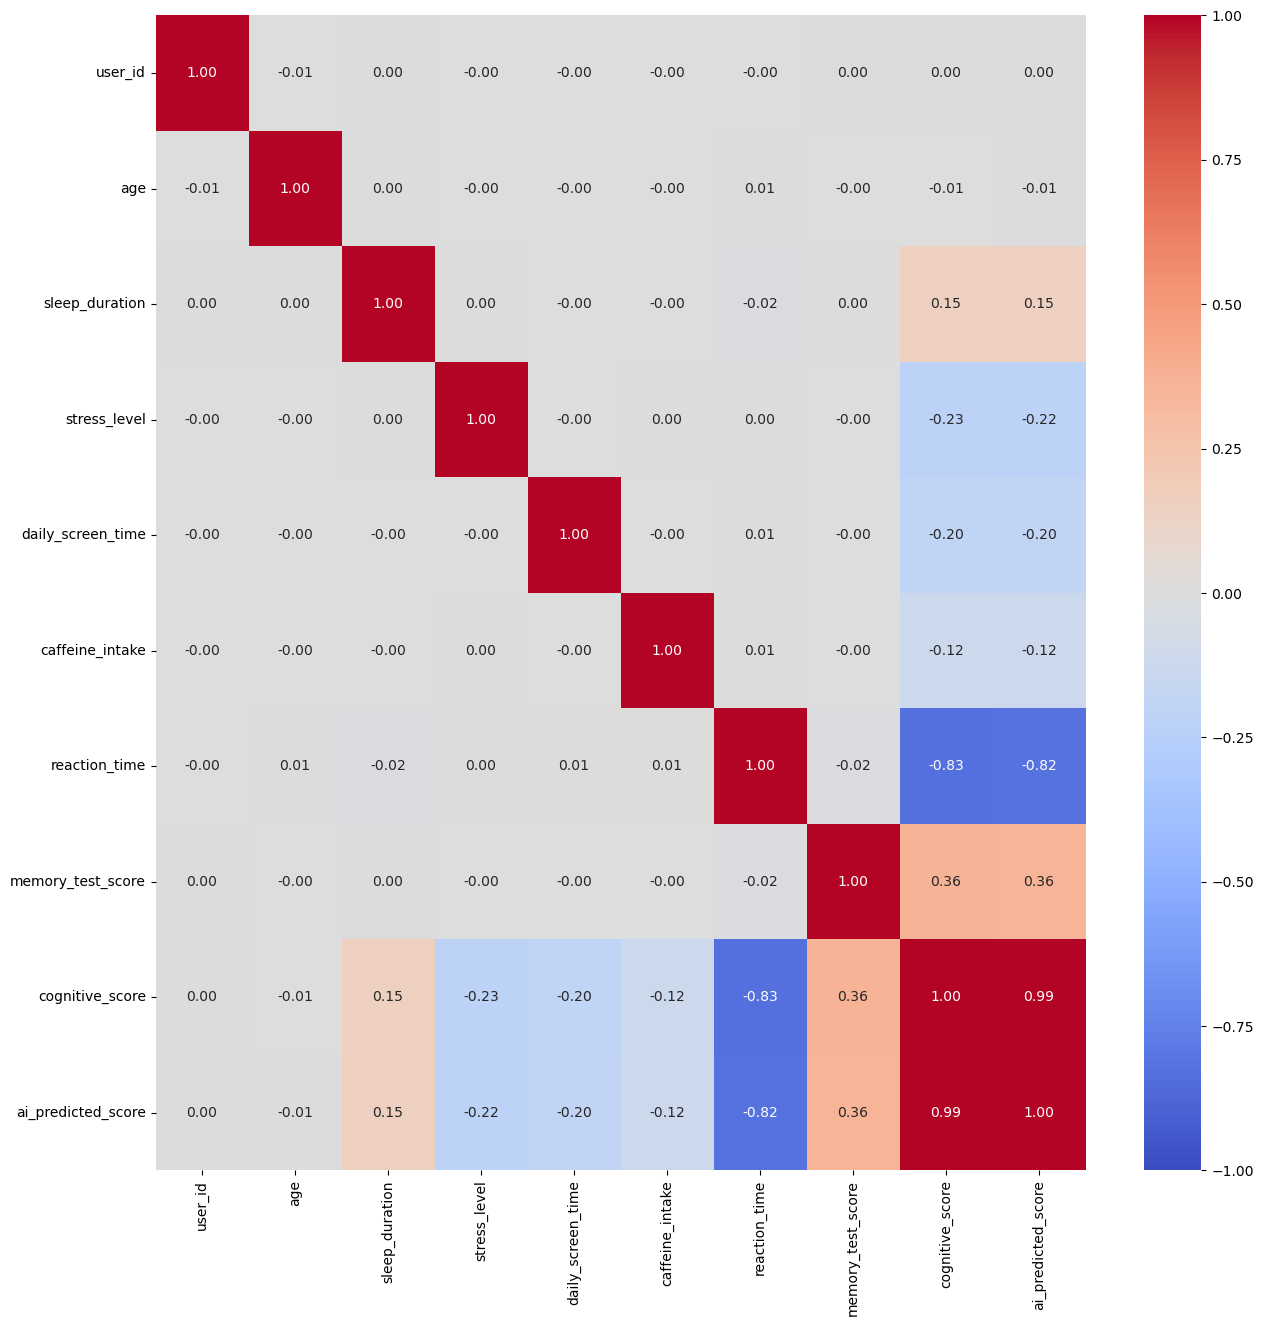

In [58]:
# establecemos el tama√±o de la gr√°fica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlaci√≥n a una gr√°fica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "coolwarm", # para establecer el color de la gr√°fica
            vmax = 1, # para indicar cual es el valor m√°ximo de nuestra escala de colores
            vmin = -1); # para identificar el valor m√≠nimo de nuestra escala de colores

**Observaciones** **A√ëADIR A MARKDOWN**
Cercano a 1: Correlaci√≥n positiva fuerte (cuando una variable aumenta, la otra tiende a aumentar).
Cercano a -1: Correlaci√≥n negativa fuerte (cuando una variable aumenta, la otra tiende a disminuir).
Cercano a 0: Correlaci√≥n d√©bil o no lineal entre las variables.

Correlaciones Positivas:
- cognitive_score y ai_predicted_score (0.99): Existe una correlaci√≥n positiva extremadamente fuerte entre la puntuaci√≥n cognitiva y la puntuaci√≥n predicha por la IA. Esto sugiere que el modelo de IA es muy bueno prediciendo la puntuaci√≥n cognitiva o que ambas variables est√°n midiendo aspectos muy similares del rendimiento cognitivo.
- memory_test_score y cognitive_score (0.35): Existe una correlaci√≥n positiva moderada, lo que es esperable ya que la memoria es un componente de la cognici√≥n. Una mejor puntuaci√≥n en la prueba de memoria tiende a estar asociada con una puntuaci√≥n cognitiva m√°s alta.
- sleep_duration y cognitive_score (0.14): Hay una correlaci√≥n positiva d√©bil pero presente, indicando que una mayor duraci√≥n del sue√±o tiende a estar ligeramente asociada con una puntuaci√≥n cognitiva m√°s alta.

Correlaciones Negativas:
- reaction_time y memory_test_score (-0.82): Hay una correlaci√≥n negativa fuerte. Un menor tiempo de reacci√≥n (que generalmente indica una mejor agilidad mental) est√° fuertemente asociado con una puntuaci√≥n m√°s alta en la prueba de memoria.
- reaction_time y cognitive_score (-0.82): Similarmente, una correlaci√≥n negativa fuerte entre el tiempo de reacci√≥n y la puntuaci√≥n cognitiva. Un menor tiempo de reacci√≥n se asocia con una puntuaci√≥n cognitiva m√°s alta.
- stress_level y cognitive_score (-0.22): Existe una correlaci√≥n negativa d√©bil, sugiriendo que niveles m√°s altos de estr√©s tienden a estar ligeramente asociados con una puntuaci√≥n cognitiva m√°s baja.
- daily_screen_time y cognitive_score (-0.19): Hay una correlaci√≥n negativa d√©bil, indicando que un mayor tiempo de pantalla diario tiende a estar ligeramente asociado con una puntuaci√≥n cognitiva m√°s baja.
- caffeine_intake y cognitive_score (-0.12): Una correlaci√≥n negativa muy d√©bil, sugiriendo una ligera tendencia a que una mayor ingesta de cafe√≠na se asocie con una puntuaci√≥n cognitiva ligeramente m√°s baja (aunque esta correlaci√≥n es muy peque√±a y podr√≠a no ser significativa en la pr√°ctica).

Correlaciones D√©biles o Nulas (cercanas a 0):
- age tiene correlaciones muy d√©biles con la mayor√≠a de las variables, aunque hay una ligera correlaci√≥n negativa con ai_predicted_score (-0.01).
- sleep_duration tiene correlaciones d√©biles con la mayor√≠a de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- stress_level tiene correlaciones d√©biles con la mayor√≠a de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- daily_screen_time y caffeine_intake tambi√©n muestran correlaciones d√©biles en general.

En Resumen:

Las relaciones m√°s notables pueden ser:
La fuerte relaci√≥n positiva entre prueba de memoria y puntuaci√≥n cognitiva.
Una mayor duraci√≥n del sue√±o tiende a estar ligeramente asociada con una puntuaci√≥n cognitiva m√°s alta. La ligera relaci√≥n entre duraci√≥n del sue√±o y puntuaci√≥n cognitiva, a m√°s horas durmiendo la puntuaci√≥n tiende a ser un poco m√°s alta.
La fuerte relaci√≥n negativa entre el tiempo de reacci√≥n y las puntuaciones de memoria y cognitivas (incluida la predicci√≥n de la IA).
Relaciones d√©biles a moderadas entre el sue√±o, el estr√©s, el tiempo de pantalla, la ingesta de cafe√≠na y las puntuaciones de memoria y cognitivas.

### Next steps:
- Explorar las relaciones m√°s fuertes con m√°s detalle: Podr√≠as crear scatter plots entre reaction_time y las puntuaciones cognitivas para visualizar la naturaleza de esta relaci√≥n negativa.

### An√°lisis Categ√≥ricas y Recomendaciones de Gr√°ficos:
1. gender (Categ√≥rica) vs. Variables Num√©ricas (age, sleep_duration, stress_level, etc.):
        ¬øPor qu√© analizar? Puede haber diferencias significativas en los patrones de sue√±o, niveles de estr√©s,
        rendimiento cognitivo, etc., entre los diferentes g√©neros.
   >    Gr√°ficos recomendados:
           -    Boxplots: Son excelentes para comparar la distribuci√≥n de una variable num√©rica entre diferentes categor√≠as. Por ejemplo, un boxplot de sleep_duration por gender mostrar√≠a si hay diferencias en la duraci√≥n del sue√±o entre hombres, mujeres y otros.
           -    Violin Plots: Similares a los boxplots pero proporcionan una estimaci√≥n de la densidad de probabilidad de cada grupo, lo que puede dar una mejor idea de la forma de la distribuci√≥n.
           -    Bar Plots (con intervalos de confianza): Si quieres comparar las medias de una variable num√©rica entre los g√©neros, un bar plot mostrando la media y los intervalos de confianza puede ser √∫til.

2. diet_type (Categ√≥rica) vs. Variables Num√©ricas:
        ¬øPor qu√© analizar? La dieta podr√≠a influir en el sue√±o, los niveles de energ√≠a, la funci√≥n cognitiva y el estr√©s.
   >    Gr√°ficos recomendados:
           -    Boxplots: Para comparar la distribuci√≥n de variables como sleep_duration, stress_level, memory_test_score, cognitive_score entre los diferentes tipos de dieta (Non-Vegetarian, Vegetarian, Vegan).
           -    Violin Plots: Para ver la forma de la distribuci√≥n de estas variables num√©ricas para cada tipo de dieta.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de dieta.

3. exercise_frequency (Categ√≥rica) vs. Variables Num√©ricas:
        ¬øPor qu√© analizar? La frecuencia de ejercicio es un factor importante para la salud f√≠sica y mental, 
        y podr√≠a estar relacionado con el sue√±o, el estr√©s, el tiempo de reacci√≥n y el rendimiento cognitivo.
   >    Gr√°ficos recomendados:
           -    Boxplots: Para comparar la distribuci√≥n de sleep_duration, stress_level, reaction_time, memory_test_score, cognitive_score entre los diferentes niveles de frecuencia de ejercicio (Low, Medium, High).
           -    Violin Plots: Para observar la distribuci√≥n detallada de estas variables num√©ricas por frecuencia de ejercicio.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de frecuencia de ejercicio.


### An√°lisis entre Variables Categ√≥ricas:
¬øPor qu√© analizar? Por ejemplo, podr√≠a haber una distribuci√≥n diferente de tipos de dieta entre los g√©neros o diferentes frecuencias de ejercicio entre los grupos de edad (si hubieras categorizado 'age').
  >    Gr√°ficos recomendados:
   -    Stacked Bar Charts o Grouped Bar Charts: Para comparar las proporciones de una variable categ√≥rica dentro de las categor√≠as de otra. Por ejemplo, la proporci√≥n de cada tipo de dieta para cada g√©nero.
   -    Count Plots (con hue): Puedes usar seaborn.countplot() con el argumento hue para visualizar la distribuci√≥n de una variable categ√≥rica dividida por las categor√≠as de otra.

## 1. Gender vs V. Num√©ricas

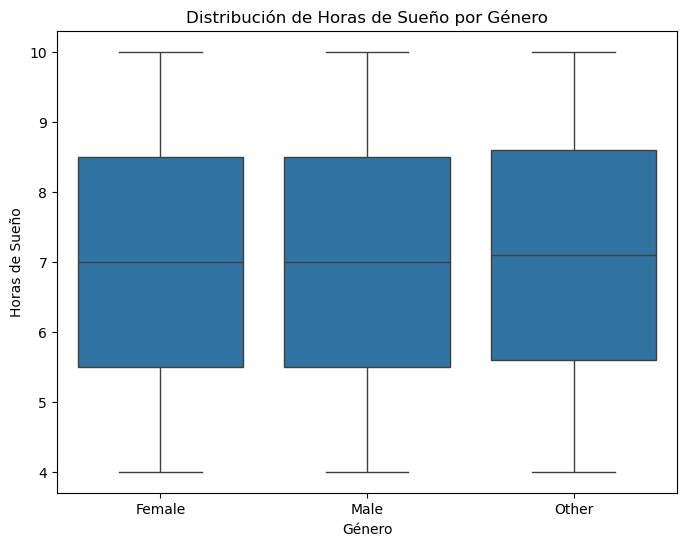

In [59]:
# Boxplot de Sleep Duration por Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='sleep_duration', data=df_analisis)
plt.title('Distribuci√≥n de Horas de Sue√±o por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Horas de Sue√±o')
plt.show()

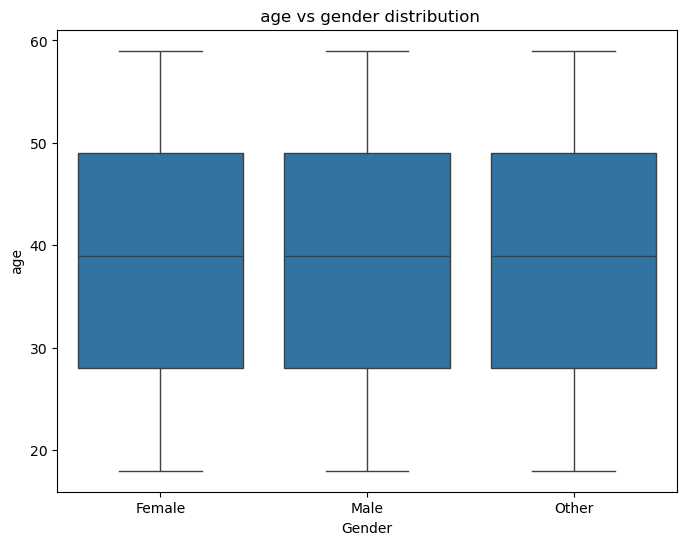

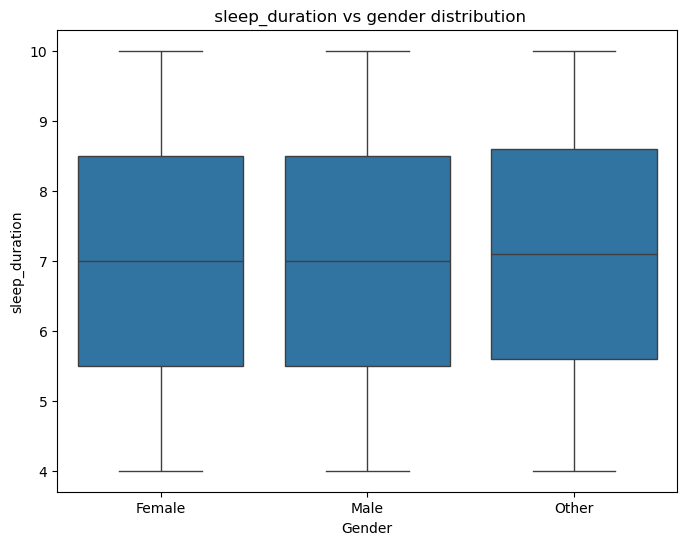

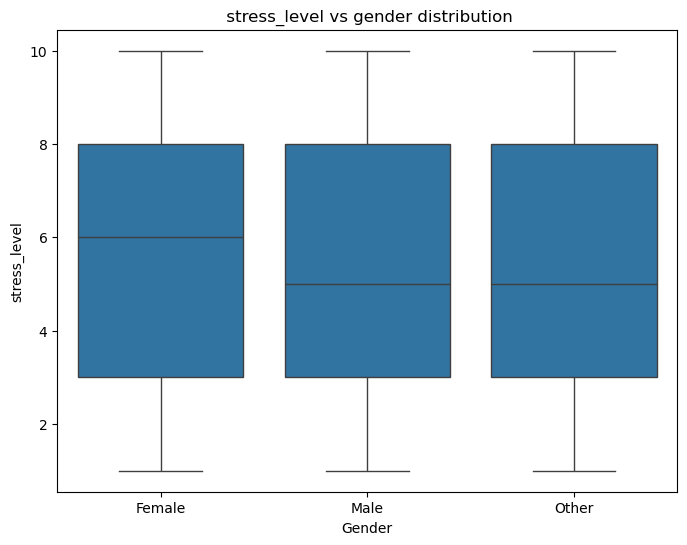

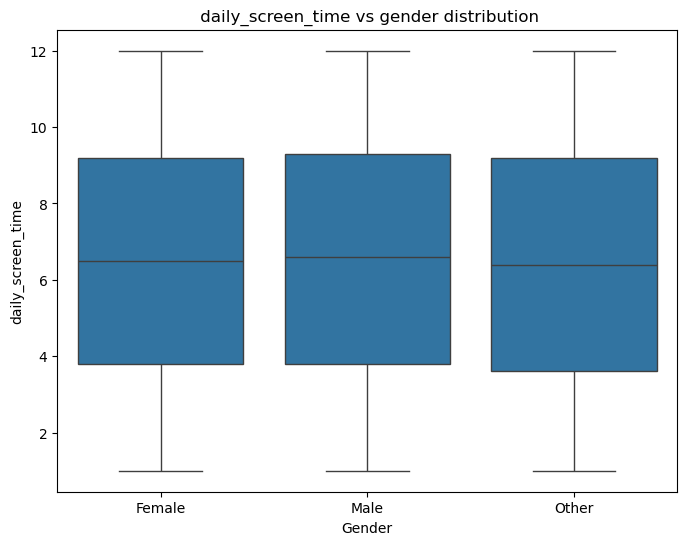

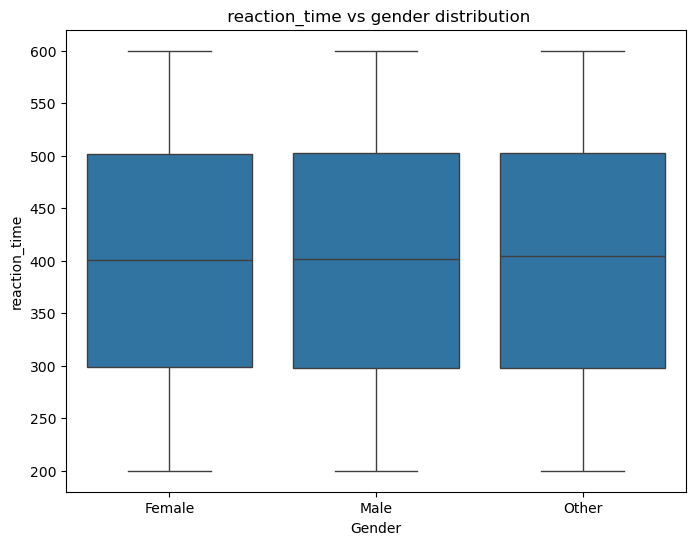

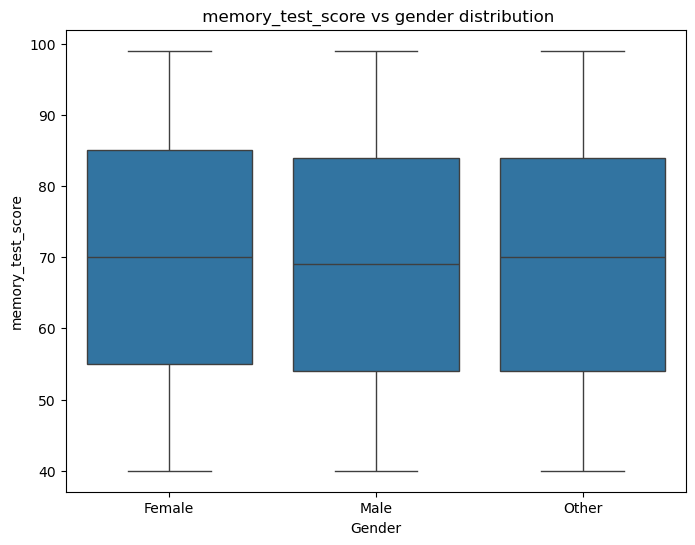

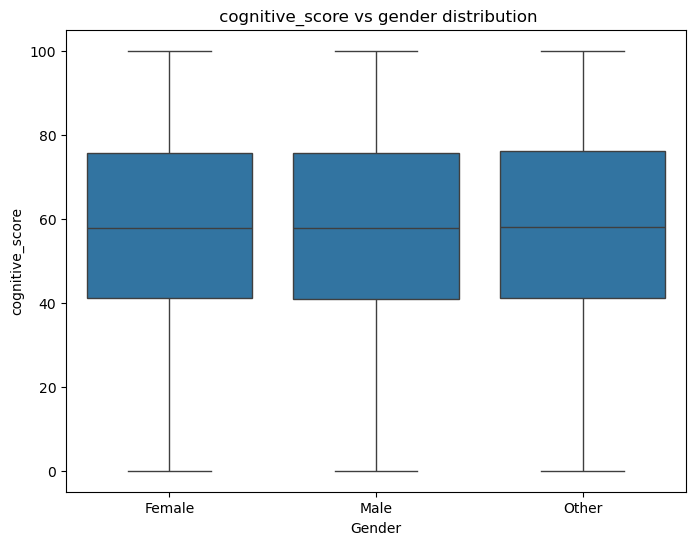

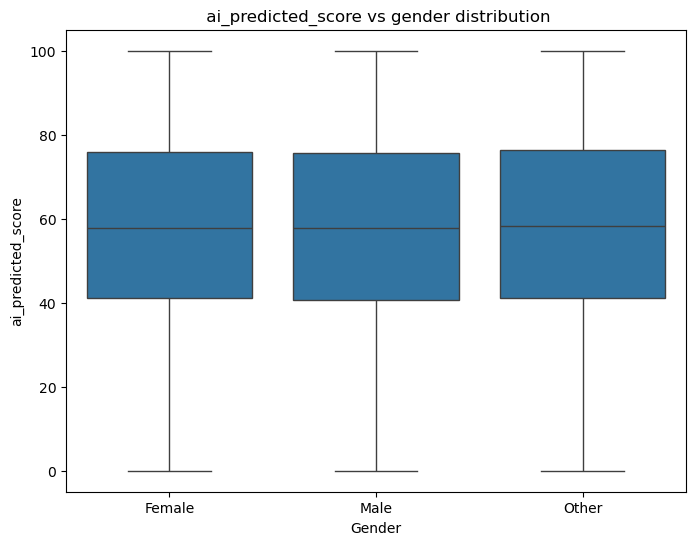

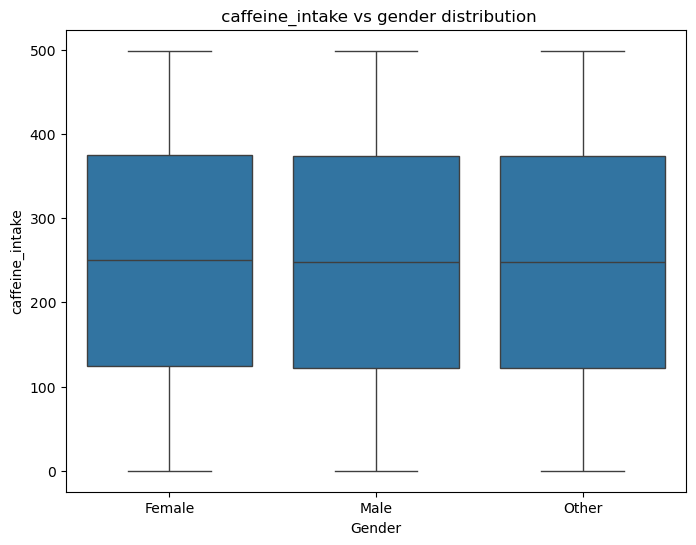

In [60]:
 # Boxplots para comparar distribuciones con g√©nero
numerical_cols = ['age', 'sleep_duration', 'stress_level', 'daily_screen_time',
                          'reaction_time', 'memory_test_score', 'cognitive_score',
                          'ai_predicted_score', 'caffeine_intake']

for col in numerical_cols:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='gender', y=col, data=df_analisis)
            plt.title(f' {col} vs gender distribution')
            plt.xlabel('Gender')
            plt.ylabel(col)
            plt.show()

**No observamos variaciones por g√©nero**

<Axes: xlabel='stress_category', ylabel='count'>

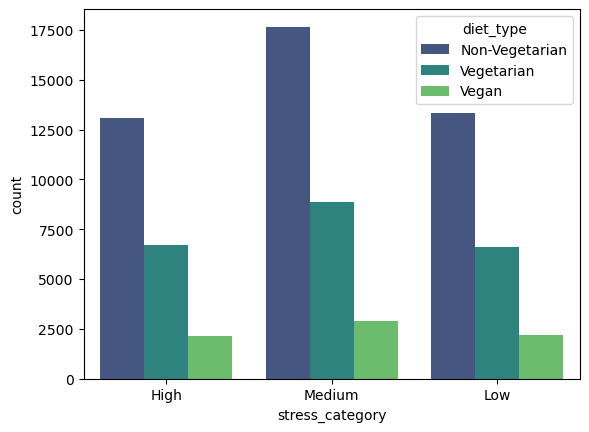

In [61]:
# Gr√°fico de barras para comparar categor√≠as de nivel de estr√©s y tipo de dieta
sns.countplot(x = "stress_category",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='gender', ylabel='count'>

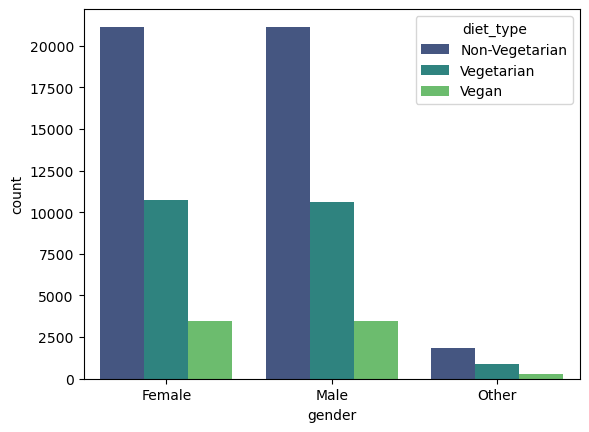

In [62]:
# Gr√°fico de barras para comparar  g√©nero y tipo de dieta
sns.countplot(x = "gender",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='diet_type', ylabel='generation'>

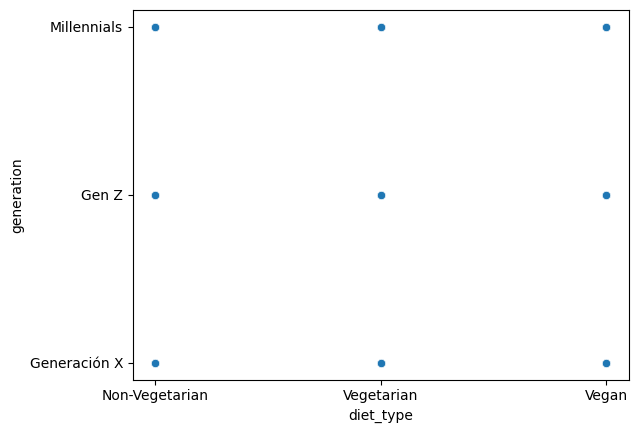

In [63]:
sns.scatterplot(x = "diet_type",
                y = "generation",
                data = df_analisis)

In [64]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score', 'generation',
       'stress_category', 'caffeine_category', 'reaction_time_category',
       'memory_score_category', 'cognitive_category', 'ai_cognitive_category'],
      dtype='object')

*Multivariedad: Las relaciones entre variables pueden ser complejas y estar influenciadas por otras variables. Consideramos la posibilidad de realizar an√°lisis multivariados m√°s adelante si encuentras relaciones interesantes a nivel bivariado.*

In [65]:
df_analisis.to_csv("test.csv")

In [66]:
df_analisis.to_excel('test.xlsx', index=True)